# 2
# PPFQ

## Construccion de indicadores

-57-

Existen categorias de indicadores:

- Indicadores sobre series de precio
    - indicadores tardíos (trend-following)
    - indicadores de saturacion (contrarians)
    - indicadores de referencia: Osciladores acotados (sobre precio o sobre indicadores)

<br />

- indicadores de flujo (volumen o derivados)

- indicadores combinados

- conteos discretos

- estacionalidad

- indicadores estáticos

- Referenciales (Benchmarks)

- Ratios y series de Análisis fundamental

- Sentiment

- Exógenos al mercado

In [1]:
from dotenv import load_dotenv
import os
from apps.forex_api import fx_price, fx_it
import pandas as pd
import pandas_ta as ta
import numpy as np
import seaborn as sns
from scipy import stats


load_dotenv()
TOKEN = os.environ["TOKEN_AV"]
# data = fx_price("FX_DAILY", "EUR", "USD", TOKEN)

In [2]:
# data.to_csv('data-daily-raw.csv')

data = pd.read_csv("data-daily-raw.csv", index_col=0)

In [4]:
# AJUSTE DE DATA
new_labels = ['Open', "High", "Low", "Close"]

data.rename(dict(zip(data.columns, new_labels)), axis=1, inplace=True)

data = data.iloc[-1::-1]


### Indicadores tardíos

-58-

In [5]:
from apps.medias_moviles import moving_averages

moving_averages(data, "Close", window=50)

,SMA_50,EMA_50,WMA_50,DEMA_50,TRIMA_L_50,TEMA_50
2003-08-29,NaN,1.097900,NaN,1.097900,NaN,1.097900
2003-09-01,NaN,1.097084,NaN,1.096684,NaN,1.096488
2003-09-02,NaN,1.091437,NaN,1.087488,NaN,1.085041
2003-09-03,NaN,1.088776,NaN,1.083917,NaN,1.081452
2003-09-04,NaN,1.089689,NaN,1.086598,NaN,1.086051
...,...,...,...,...,...,...
2022-10-24,0.989811,0.991197,0.984235,0.972776,1.009285,0.974561
2022-10-25,0.989409,0.991409,0.984502,0.973914,1.008461,0.976519
2022-10-26,0.989216,0.992058,0.985229,0.975873,1.007654,0.979635
2022-10-27,0.988972,0.992230,0.985512,0.976844,1.006864,0.981226


-61-

LISTA DE INDICADORES POR CATEGORIA:

- Momentum (trend-following):
    - MACD
    - ADX
    - DX
    - ADXR
    - MINUS_DI, PLUS_DI, MINUS_DM, PLUS_DM (componentes del ADX)
    - SAR (parabolic SAR- Trailing Stop)
    - MOM 
    - MIDPOINT
    - MIDPRICE

<br />    

- Contrarian:
    - CCI (Commodity channel index, indica inicio y fin de tendencia)
    - AROON (Anticipador de inicio de tendencia)
    - AROONOSC (diferencia entre las curvas de AROON)
    - BBAND (bollinger band)
    - TRANGE: Proxy de "volatilidad" True Range, es un estimador del rango normal de trading o movimiento
    - ATR: Average True Range, es la media móvil del True Range, la media movil del rango de movimiento, en términos absolutos

<br />

- Osciladores trend-following:
    - WILLR (similar estocástico)
    - APO (Absolute Price oscilator)
    - PPO (Percantage Price oscilator)
    - STOCH, STOCHF: El conocido oscilador estocástico sobre el OHLC
    - RSI
    - BOP (balance of power)
    - CMO (Chande momentum oscilator) - variante rsi
    - ROC (mide variacion % respecto a n ruedas atras)
    - MFI (Money flow index) - se interpreta como el RSI pero tiene en cuenta el volumen
    - TRIX - oscilador de TEMA para n ruedas atras
    - ULTOSC (Ultimate Oscilator) - oscilador de 3 períodos, es como promediar 3 RSIs con 3 n diferentes

In [6]:
# MACD
def macd(data, label, fast, slow, suavizado):
    dataux = pd.DataFrame()
    ema_fast = data[label].ewm(span=fast).mean()
    ema_slow = data[label].ewm(span=slow).mean()
    dataux['macd'] = ema_fast - ema_slow
    dataux['signal'] = dataux.macd.ewm(span=suavizado).mean()
    dataux['histograma'] = dataux.macd - dataux.signal
    return dataux.dropna()#.round(3)

macd(data, "Close", fast=12, slow=26, suavizado=9)

,macd,signal,histograma
2003-08-29,0.000000,0.000000,0.000000
2003-09-01,-0.000036,-0.000020,-0.000016
2003-09-02,-0.000526,-0.000228,-0.000299
2003-09-03,-0.000715,-0.000393,-0.000322
2003-09-04,-0.000341,-0.000377,0.000036
...,...,...,...
2022-10-24,-0.002059,-0.004091,0.002032
2022-10-25,-0.000658,-0.003404,0.002746
2022-10-26,0.001353,-0.002453,0.003806
2022-10-27,0.001994,-0.001563,0.003557


In [7]:
# VERIFICACION DEL VALOR DE MACD
# help(ta.macd)
data.ta.macd()

,MACD_12_26_9,MACDh_12_26_9,MACDs_12_26_9
2003-08-29,NaN,NaN,NaN
2003-09-01,NaN,NaN,NaN
2003-09-02,NaN,NaN,NaN
2003-09-03,NaN,NaN,NaN
2003-09-04,NaN,NaN,NaN
...,...,...,...
2022-10-24,-0.002059,0.002032,-0.004091
2022-10-25,-0.000658,0.002746,-0.003404
2022-10-26,0.001353,0.003806,-0.002453
2022-10-27,0.001994,0.003557,-0.001563


<AxesSubplot: title={'center': 'EURUSD RSI dist'}, ylabel='Frequency'>

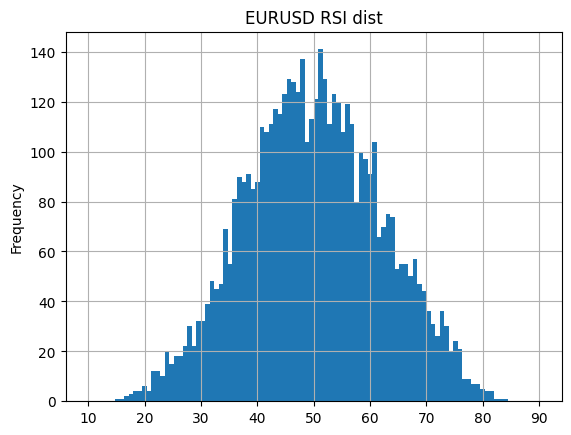

In [8]:
## VISUALIZACION RSI - INDICADOR ACOTADO
# help(ta.rsi)
data.ta.rsi()
data.ta.rsi().plot(kind='hist', grid=True, title="EURUSD RSI dist", bins=100, range=(10, 90));

In [25]:
print (f"La kurtosis es {data.ta.rsi().kurt():.2f}")
print (f"El skew es {data.ta.rsi().skew():.2f}")
print (f"La media es {data.ta.rsi().mean():.2f}")
print (f"El desvio estandar es {data.ta.rsi().std():.2f}")
print (f"La proba que sea una dist_normal es: {stats.normaltest(data.ta.rsi().dropna()).pvalue:.2%}")

La kurtosis es -0.38
El skew es 0.03
La media es 50.02
El desvio estandar es 12.10
La proba que sea una dist_normal es: 0.000000%


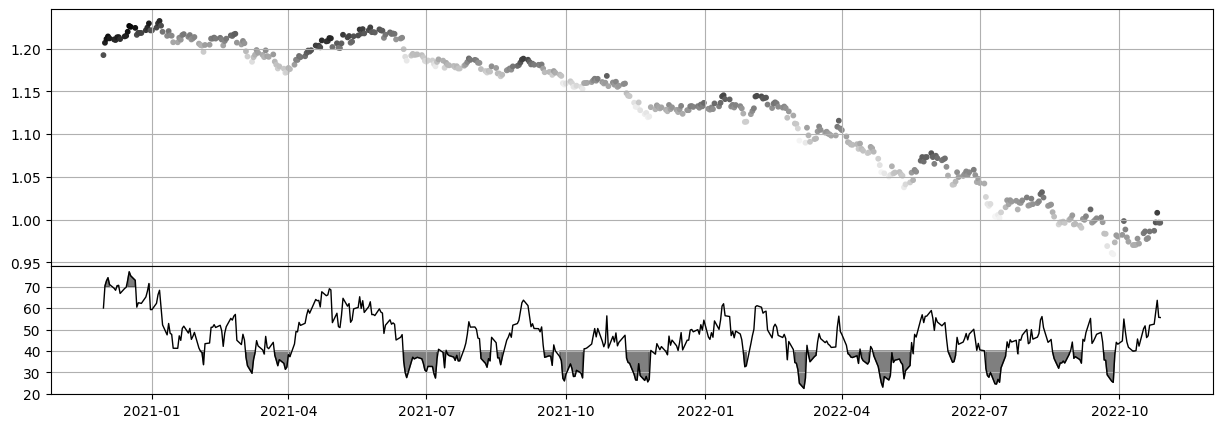

In [37]:
import matplotlib.pyplot as plt
data['rsi'] = data.ta.rsi()

fig, ax = plt.subplots(figsize=(15,5), nrows=2, gridspec_kw={'height_ratios':[2,1]})

df = data.dropna().iloc[-500:, -2:]
df.index = pd.to_datetime(df.index)
ax[0].scatter(df.index, df.Close, s=10, cmap="binary", c=df.rsi/100) 
ax[0].grid() 

ax[1].plot(df.index, df.rsi, lw=1, c='k')
ax[1].set_yticks(range(10,90,10))

ax[1].fill_between(df.index, df.rsi, 70, where=df.rsi>70, alpha=0.5, color='k')
ax[1].fill_between(df.index, df.rsi, 40, where=df.rsi<40, alpha=0.5, color='k')
ax[1].grid()

plt.subplots_adjust(hspace=0)


In [36]:
df.index

Index(['2020-11-30', '2020-12-01', '2020-12-02', '2020-12-03', '2020-12-04',
       '2020-12-07', '2020-12-08', '2020-12-09', '2020-12-10', '2020-12-11',
       ...
       '2022-10-17', '2022-10-18', '2022-10-19', '2022-10-20', '2022-10-21',
       '2022-10-24', '2022-10-25', '2022-10-26', '2022-10-27', '2022-10-28'],
      dtype='object', length=500)